###Problema2

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al

quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su expe-
riencia se refleja en la tabla siguiente.

| Periodicos | 30 |40 | 50 | 60 | 70 |
|:----------:|:--:|:--:|:--:|:--:|:--:|
| f(x)       | 20%| 25%| 25%| 20%| 10%|



La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 perió-
dicos. Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10

euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio
diario si pide 50 periódicos cada día.

### 1. Identifique las variables 

Tenemos la variable: $x_1$


### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias 

Al principio queria generar una distribución $x_1 \sim U(0, 1)$, pero me di cuenta, que no es precisamente esa distribución, ya que lo que quiero es si genero 100 números aleatorios en el rango de 0 a 1, aproximadamente el 20% de esos números caerán en el intervalo correspondiente a 30 periódicos vendidos, aproximadamente el 25% caerá en el intervalo correspondiente a 40 periódicos vendidos, y así sucesivamente. Y la distribución uniforme hace que los 10 números se reparten equitativamente en cada uno de los intervalos, entonces es una distribución discreta

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Beneficios=(Precio unitario de venta*Ventas totales)-(Coste unitario de adquisisión*pedido)-(Coste unitario de reciclaje*Periodicos no vendidos)-(Costo venta perdida*Ventas perdidas), donde

>Precio unitario de venta=1.1€

>Ventas totales= son las ventas simuladas $x_1$

>Coste unitario de adquisisón=0.9€

>Pedido= 50 periodicos pedidos

>Costo unitario de reciclaje=0.1€

>Periodico no vendido=$\left | Pedido- x_1 \right |\geq 0$; si $x_1\leq50$ 

>Costo de ventas perdidas=0.2€

>Ventas perdidas=$\left | x_1-Pedido \right |\geq 0$; si $50\leq x_1$

Ahora la variable de interés es el número de periódicos vendidos simulados. Se establece una distribución de probabilidad acumulada, denotada como $f(x)$, que enumera los puntos en los que la probabilidad acumulada cambia.

>En este caso, la distribución f(x) es la siguiente:
$f(x)=({0.2},{0.2+0.25=0.45},{0.45+0.25=0.7},{0.7+0.2=0.9},{0.9+0.10=1})$$f(x) = ({0.2, 0.45, 0.7, 0.9, 1.0})$  

Estos valores indican los puntos en los que la probabilidad acumulada cambia. Por ejemplo, entre 0 y 0.2, la probabilidad acumulada es del 20%. Entre 0.2 y 0.45, la probabilidad acumulada es del 45%, y así sucesivamente.

A partir de estos valores de f(x), se generan intervalos para asignar el número de periódicos vendidos simulados. Estos intervalos se generan de la siguiente manera:
Intervalos generados: 

>$[0 a 0.2], (0.20 a 0.45], (0.45 a 0.70], (0.70 a 0.90], (0.90 a 1.0]$

Luego, se genera un número aleatorio $x_1$, entre 0 y 1. Dependiendo del valor de $x_1$, se asigna un número de periódicos vendidos simulados de acuerdo con los intervalos establecidos. Por ejemplo, si $x_1$ está entre 0 y 0.20, se asigna un valor de 30 periódicos vendidos simulados. Si está entre 0.20 y 0.44, se asigna un valor de 40 periódicos vendidos simulados, y así sucesivamente.

In [127]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
from collections import Counter

In [128]:
periódicos = [30, 40, 50, 60, 70]  
probabilidades = [0.2, 0.25, 0.25, 0.2, 0.1]  

In [142]:
def generar_distribución_discreta(n):
    resultados = []
    for _ in range(n):
        x = random.random()
        acumulado = 0
        for i in range(len(probabilidades)):
            acumulado += probabilidades[i]
            if x <= acumulado:
                resultados.append(periódicos[i])
                break
    return resultados

numeros_aleatorios = generar_distribución_discreta(100)
recuento = Counter(numeros_aleatorios)
porcentaje_repetidos = sum(recuento.values()) / len(numeros_aleatorios) * 100

print("Recuento de los números repetidos:")
for periódico, conteo in recuento.items():
    print(f"{conteo} números cayeron en {periódico} periódicos")

print(f"\nPorcentaje de números repetidos: {porcentaje_repetidos}%")



Recuento de los números repetidos:
27 números cayeron en 40 periódicos
24 números cayeron en 50 periódicos
23 números cayeron en 30 periódicos
8 números cayeron en 70 periódicos
18 números cayeron en 60 periódicos

Porcentaje de números repetidos: 100.0%


In [133]:
media = np.mean(list(recuento.elements()))
desviacion_estandar = np.std(list(recuento.elements()))

print("Media:", media)
print("Desviación estándar:", desviacion_estandar)


Media: 47.2
Desviación estándar: 12.496399481450647


### 5. Diseñe el experimento

Para calcular la ganancia con la formula descrita en el paso 4, y tener el promedio de haber comprado 50 periodicos en 100 diás y usando los valores aleatorios del codigo anterior teniendo en cuenta que buelve a generarse los números, pero el codigo si respeta la distribución, (20%,25%,25%,20%,10) en el paso 4 se tiene.

In [138]:
def calcular_ganancia_promedio(pedido, dias_simulacion):
    # Definir los parámetros y costos
    precio_venta = 1.1
    costo_adquisicion = 0.9
    costo_reciclaje = 0.1
    costo_perdida = 0.2

    ganancias_diarias = []

    for _ in range(dias_simulacion):
        # Generar un número aleatorio para simular las ventas
        num_ventas = random.uniform(0, 1)
    
        # Asignar la cantidad de periódicos vendidos según la distribución
        if num_ventas <= 0.2:
            ventas = 30
        elif num_ventas <= 0.45:
            ventas = 40
        elif num_ventas <= 0.7:
            ventas = 50
        elif num_ventas <= 0.9:
            ventas = 60
        else:
            ventas = 70
    
        # Calcular las pérdidas no realizadas si hay menos ventas que el pedido
        perdidas_no_realizadas = abs(pedido - ventas) if ventas < pedido else 0
    
        # Calcular la ganancia diaria
        ganancia = (precio_venta * ventas) - (costo_adquisicion * pedido) - (costo_reciclaje * perdidas_no_realizadas) - (costo_perdida * perdidas_no_realizadas)
        ganancias_diarias.append(ganancia)
    
    # Calcular la ganancia promedio diaria
    ganancia_promedio = sum(ganancias_diarias) / dias_simulacion
    return ganancia_promedio


In [137]:
pedido = 50
dias_simulacion = 100

### 6. Repita el experimento $n$ veces 

Una forma de hacerlo es mediante el siguiente codigo.

Recuento de los números repetidos:
25 números cayeron en 50 periódicos
18 números cayeron en 60 periódicos
30 números cayeron en 40 periódicos
13 números cayeron en 30 periódicos
14 números cayeron en 70 periódicos

Porcentaje de números repetidos: 100.0%


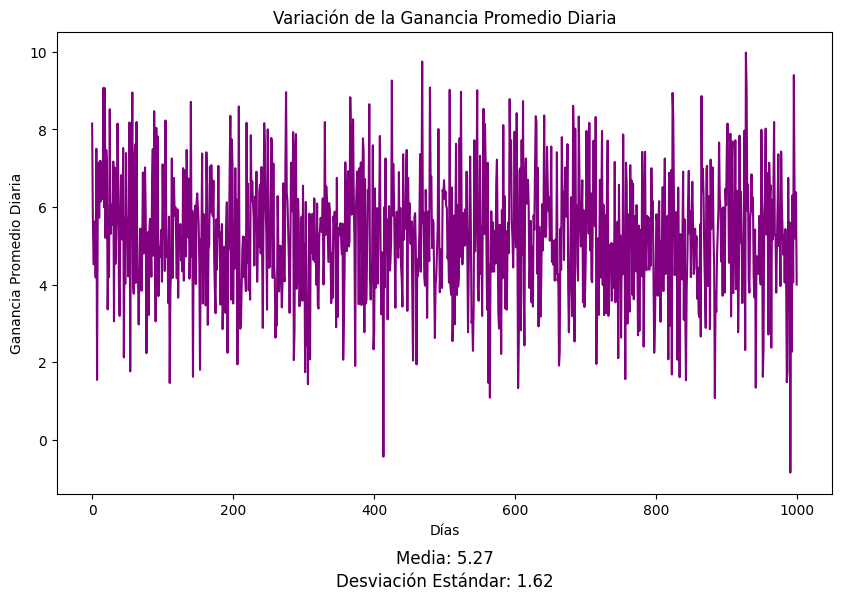

In [139]:
def generar_distribución_discreta(n):
    resultados = np.random.choice(periódicos, n, p=probabilidades)
    return resultados

numeros_aleatorios = generar_distribución_discreta(100)
recuento = Counter(numeros_aleatorios)

print("Recuento de los números repetidos:")
for periódico, conteo in recuento.items():
    print(f"{conteo} números cayeron en {periódico} periódicos")

porcentaje_repetidos = sum(recuento.values()) / len(numeros_aleatorios) * 100
print(f"\nPorcentaje de números repetidos: {porcentaje_repetidos}%")

ganancias_promedio = []

for _ in range(1000):
    ganancia_promedio = calcular_ganancia_promedio(pedido, dias_simulacion)
    ganancias_promedio.append(ganancia_promedio)

plt.figure(figsize=(10, 6))
plt.plot(ganancias_promedio, color='purple')
plt.xlabel('Días')
plt.ylabel('Ganancia Promedio Diaria')
plt.title('Variación de la Ganancia Promedio Diaria')

media = np.mean(ganancias_promedio)
desviacion_estandar = np.std(ganancias_promedio)

plt.text(0.5, -0.15, f'Media: {media:.2f}', transform=plt.gca().transAxes, ha='center', fontsize=12)
plt.text(0.5, -0.2, f'Desviación Estándar: {desviacion_estandar:.2f}', transform=plt.gca().transAxes, ha='center', fontsize=12)

plt.show()

### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [145]:
media = np.mean(ganancias_promedio)
desviacion_estandar = np.std(ganancias_promedio)

In [146]:
# Calcular la media y desviación estándar
media = np.mean(ganancias_promedio)
desviacion_estandar = np.std(ganancias_promedio)

# Calcular el intervalo de confianza del 95%
n = len(ganancias_promedio)
intervalo_inferior = media - 1.96 * desviacion_estandar / np.sqrt(n)
intervalo_superior = media + 1.96 * desviacion_estandar / np.sqrt(n)

# Imprimir el intervalo de confianza
print(f"Intervalo de confianza (95%): [{intervalo_inferior:.2f}, {intervalo_superior:.2f}]")


Intervalo de confianza (95%): [5.17, 5.37]


### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [147]:
# Definir los parámetros
sigma = np.std(ganancias_promedio)  # Desviación estándar
z_alpha_over_2 = 1.96  # Valor crítico para un nivel de confianza del 95%
epsilon = 0.05  # Precisión deseada

# Calcular el número de iteraciones requeridas
N = np.ceil((2 * sigma * z_alpha_over_2 / epsilon) ** 2)

# Imprimir el número de iteraciones requeridas
print(f"Número de iteraciones requeridas: {int(N)}")

Número de iteraciones requeridas: 16104


### Podemos comparar con la sulución analítica del problema.

Vamos a ver si nos acercamos a la solución analótica.

Basandonos en los datos del problema, donde se espera que el quiosquero compra 50 periodicos por día, tenemos:

In [ ]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [ ]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

0.0013020883830878738

###Solución analítica
Para calcular el beneficio promedio diario necesario, necesitamos considerar los ingresos y los costos asociados a cada nivel de venta de periodicos, es decir:

Beneficios=(Precio unitario de venta*Ventas totales)-(Coste unitario de adquisisión*pedido)-(Coste unitario de reciclaje*Periodicos no vendidos)-(Costo venta perdida*Ventas perdidas), donde

>Precio unitario de venta=1.1€

>VentasTotales= son el numero de ventas

>Coste unitario de adquisisón=0.9€

>Pedido= 50 periodicos pedidos

>Costo unitario de reciclaje=0.1€

>Periodico no vendido=$\left | Pedido- VentasTotales \right |\geq 0$; si $VentasTotales\leq50$ 

>Costo de ventas perdidas=0.2€

>Ventas perdidas=$\left | x_1-Pedido \right |\geq 0$; si $50\leq Ventas Totales$, aqui en este caso son ventas no realizadas, por ejemplo si se acabaron los 50 periodicos, y llega otro cliente y decide comprar un periodico, pero ya no hay periodicos para vender, entonces hay una perdida para el quiosquero



Bueno voy a intentarlo por diagrama de arbol

                  30 (0.20)
               /        \
            /             \
           /               \
       -18                  40 (0.25)
                           /      \
                        /           \
                     /                \
                  -4                  50 (0.25)
                                       /     \
                                    /           \
                                 /                \
                              10                  60 (0.20)
                                                 /     \
                                              /           \
                                           /                \
                                        21                  70 (0.10)


En el diagrama de arbol de probabilidad, cada nodo representa una cantidad de periódicos vendidos y la probabilidad asociada a esa cantidad. Por ejemplo, el nodo "30" representa la venta de 30 periódicos con una probabilidad del 20%. Los nodos se ramifican en función de las probabilidades correspondientes.

Ahora, para calcular el beneficio promedio diario, se deben calcular los beneficios para cada escenario y luego ponderarlos por las probabilidades correspondientes. Aquí tienes los cálculos:

Beneficio(30) = (1.10 * 30) - (0.90 * 50) - (0.10 * 20) - (0.20 * 20) = 33 - 45 - 2 - 4 = -18


Beneficio(40) = (1.10 * 40) - (0.90 * 50) - (0.10 * 10) - (0.20 * 10) = 44 - 45 - 1 - 2 = -4


Beneficio(50) = (1.10 * 50) - (0.90 * 50) - (0.10 * 0) - (0.20 * 0) = 55 - 45 - 0 - 0 = 10


Beneficio(60) = (1.10 * 60) - (0.90 * 50) - (0.10 * 0) - (0.20 * 0) = 66 - 45 - 0 - 0 = 21


Beneficio(70) = (1.10 * 70) - (0.90 * 50) - (0.10 * 20) - (0.20 * 20) = 77 - 45 - 2 - 4 = 26


Luego, para calcular la ganancia promedio diaria, considerando las probabilidades dadas, se realiza la siguiente suma ponderada:

Ganancia Promedio Diaria = (Beneficio(30) * 0.20) + (Beneficio(40) * 0.25) + (Beneficio(50) * 0.25) + (Beneficio(60) * 0.20) + (Beneficio(70) * 0.10)

Sustituimos:

Ganancia Promedio Diaria = (-18 * 0.20) + (-4 * 0.25) + (10 * 0.25) + (21 * 0.20) + (26 * 0.10) = -3.6 - 1 + 2.5 + 4.2 + 2.6 = 5.7€

Por lo tanto, el resultado correcto de la ganancia promedio diaria es de 5.7€.

Conclución: Bueno estoy satisfecho con la simulación y con el método analítico, son muy pareceidos en respuesta, así que así lo dejo. 